In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


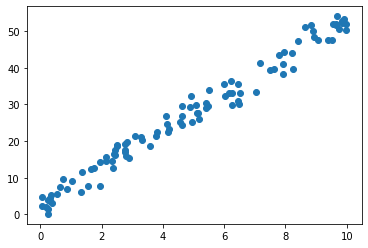

In [ ]:
#构造线性回归数据
x=np.random.uniform(0,10.,100)
y_org=x*5.+3.+np.random.randn(100)*2 #增加噪声

#作图查看数据分布情况
plt.scatter(x,y_org)

In [ ]:
#线性函数模型
w=tf.Variable(0.1,dtype=tf.float32)
b=tf.Variable(0.1,dtype=tf.float32)

def model(x,w,b):
  return x*w+b

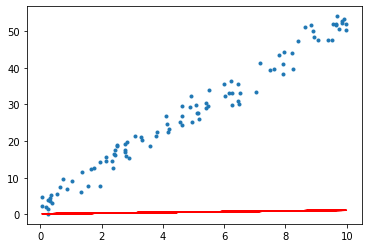

In [ ]:
#查看初始数据和模型
plt.plot(x,y_org,'.',x,model(x,w,b),'r')

In [ ]:
#损失函数
def loss_fun(y0,y_pred):
  # return tf.reduce_mean(tf.square(y0-y_pred))
  return tf.reduce_mean(tf.math.abs(y0-y_pred))

#训练函数
def train(w,b,y,lr=0.01):
  with tf.GradientTape() as t:
    loss=loss_fun(y,model(x,w,b))
    lr_weight,lr_bias=t.gradient(loss,[w,b])
    w.assign_sub(lr*lr_weight)
    b.assign_sub(lr*lr_bias)

In [ ]:
epochs=3000
losses=[]
for epoch in range(epochs):
  real_loss=loss_fun(y_org,model(x,w,b))
  losses.append(real_loss)
  train(w,b,y_org,lr=0.01)
  if epoch % 50==0:
    print(f"Epoch count{epoch}: Loss value:{real_loss.numpy()}")

Epoch count0: Loss value:1.9422755241394043
Epoch count50: Loss value:1.9318063259124756
Epoch count100: Loss value:1.921257734298706
Epoch count150: Loss value:1.9127119779586792
Epoch count200: Loss value:1.9063310623168945
Epoch count250: Loss value:1.900345802307129
Epoch count300: Loss value:1.8959492444992065
Epoch count350: Loss value:1.8915916681289673
Epoch count400: Loss value:1.8871116638183594
Epoch count450: Loss value:1.8827518224716187
Epoch count500: Loss value:1.8783725500106812
Epoch count550: Loss value:1.8743499517440796
Epoch count600: Loss value:1.8714979887008667
Epoch count650: Loss value:1.8685945272445679
Epoch count700: Loss value:1.865760326385498
Epoch count750: Loss value:1.862838864326477
Epoch count800: Loss value:1.8600047826766968
Epoch count850: Loss value:1.8571280241012573
Epoch count900: Loss value:1.8554749488830566
Epoch count950: Loss value:1.854245901107788
Epoch count1000: Loss value:1.8533320426940918
Epoch count1050: Loss value:1.85241854190

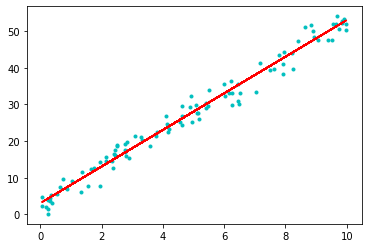

In [ ]:
plt.plot(x,y_org,'c.',x,model(x,w,b),'r')

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0029755> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0300188>


(0.0, 10.0)

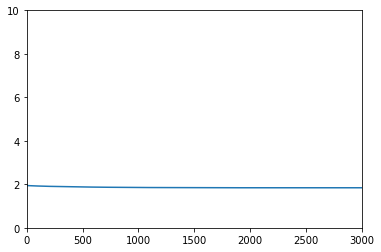

In [ ]:
print(w,b)
plt.plot(np.arange(len(losses)),losses)
plt.xlim((-1,3000))
plt.ylim((0,10.))